<a href="https://colab.research.google.com/github/HydroinformaticsLab/ColabWorkshop/blob/master/ExeciseHiLabML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2 Reading data in Google Colab

##### Gerald Augusto Corzo 
Practice Colab, IHE Delft 2020 - 07- 28
Session 2

**Contents**

Reding rainfall data from different sources

1. Reading Excel and CSV
2. Read Era5 raster data from API
3. Using google earth engine 
4. From Kaggles website




<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1d79vtB9U2tsbCLdKom7oU_Hr1WhkPbqs#scrollTo=uyZ6I6WGoCAx"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/HydroinformaticsLab/ColabWorkshop/blob/master/ExeciseHiLabML1.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# 1) Reading from Excel and CSV 

This practice will aim at getting acquinted with the Google drive access and reading a simple data set created in a local machine.



### Mount your GDrive

The first example on how to bring data will be done by GDrive


Task: Read a file created by you in the goole colab by uploading it into GDrive and reading it using pandas.

Create a file in your computer with the following data

A,B,C,D,E, target

1,2,3,4,5, 0  

12,15,121,124,135, 1

213,322,243,214,326, 0

Steps
1. Open drive.google.com
2. Create a folder named  "practice1" on the root of gDrive
3. Upload a text file with the following content and name it "data.csv"

Time estimated 10 minutes

--- 



Now see in if the mount drive works

Functions to remember in linux are $ls$ and $pwd$, which are meant to help list the contents of a directory and to show the $p$ath of the $w$orking $d$irectory 

In [3]:
!pwd
!ls

/content
drive  sample_data


Now we mount the drive, 

Note: if you have done it previously then there is no need for this step.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


To navigate the virtual machine hard drive structure you can also use the python os library. 

os.chdir makes a change in the location of the current directory

In [0]:
import os
os.chdir("drive/My Drive/practice1")


In [6]:
!ls
!pwd

data.gsheet
/content/drive/My Drive/practice1


Now we import pandas and read it is done in a normal notebook in your local machine

In [0]:
!ls
import pandas as pd
df= pd.read_csv("data.csv")
df.describe()
df.info()
df.summary()

To plot it, we can add a matplotlib and visualize the contents

In [0]:
df.plot()

# 2) Reading Era5 Reanalysis data


We would like to analyze the time series data from 

https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview




#### Seeting up the environment

We will use the API from the copernicus climate website, please register. And look for the API information and the process to register the API on your local machien (key and url).

https://cds.climate.copernicus.eu/api-how-to


You need to register and obtain the two parameters below 

In [11]:
!echo "url: https://cds.climate.copernicus.eu/api/v2" > $HOME/.cdsapirc
!echo "key: 18475:0918427e-3da7-45da-991c-161d92b9b707" >> $HOME/.cdsapirc

!pip install cdsapi

#[-87.60483030714467,13.402246848143117]
#[-86.62704710401967,13.402246848143117]
#[-86.62704710401967,13.925339395097156]
#[-87.60483030714467,13.925339395097156]
#[-87.60483030714467,13.402246848143117]

  Created wheel for cdsapi: filename=cdsapi-0.2.7-py2.py3-none-any.whl size=11487 sha256=0c003b5024044d08cd741fc35e21f8759f6d580d1a0fc1f32503489b8ffbde5a
  Stored in directory: /root/.cache/pip/wheels/45/dd/13/b6a05d1b30236d50ffcba30bd238fd1db37f6b89cd9ef35951
Successfully built cdsapi


To map the region where the rain is falling we are going to select the 



!echo "url: https://cds.climate.copernicus.eu/api/v2" > $HOME/.cdsapirc


!echo "key: 18475:0918427e-3da7-45da-991c-161d92b9b707" >> $HOME/.cdsapirc

In [12]:
import cdsapi
import xarray as xr
product = 'reanalysis-era5-single-levels'
request = {'product_type': 'reanalysis',
           'format': 'netcdf',
           'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
                   '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
                   '22', '23', '24', '25', ' 26', '27', '28', '29', '30', '31'],
           'time': ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
                    '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
                    '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
                    '20:00', '21:00', '22:00', '23:00'],
           'area': [-87.66, -87.65, 13.4, 13.92],
           'year': 2016,
           'month': 1,
           'variable': ['100m_u_component_of_wind',
                        '100m_v_component_of_wind',
                        '2m_temperature',
                        'runoff',
                        'soil_temperature_level_4',
                        'surface_net_solar_radiation',
                        'surface_pressure',
                        'surface_solar_radiation_downwards',
                        'toa_incident_solar_radiation',
                        'total_sky_direct_solar_radiation_at_surface']}

result = cdsapi.Client().retrieve(
    product,
    request
)

result.download("test.nc")

ds = xr.open_dataset("test.nc")
ds['ro'].to_series().describe()

2020-05-27 10:29:42,945 INFO Welcome to the CDS
2020-05-27 10:29:42,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-05-27 10:29:43,402 INFO Request is queued
2020-05-27 10:29:44,506 INFO Request is running
2020-05-27 10:40:04,291 INFO Request is completed
2020-05-27 10:40:04,294 INFO Downloading http://136.156.133.39/cache-compute-0012/cache/data7/adaptor.mars.internal-1590575383.4526281-16731-1-be382549-d2c1-47c2-93f2-1e11c9872f0d.nc to test.nc (2.3G)
2020-05-27 10:43:05,865 INFO Download rate 12.9M/s


count    1.226372e+08
mean     1.155865e-05
std      1.150175e-04
min      9.313226e-10
25%      9.313226e-10
50%      9.313226e-10
75%      9.313226e-10
max      2.727699e-02
Name: ro, dtype: float64

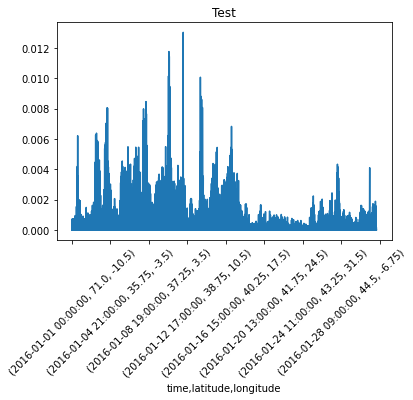

In [0]:
import matplotlib.pyplot as plt

ds['ro'].to_series().plot(title="Test",rot=45 )

# 3) Reading data from Google earth


### Google earth engine catalog


https://developers.google.com/earth-engine/datasets/catalog






#### google colab 

This is needed when you run the jupyter notebook from your own terminal 

In [0]:
from google.colab import auth
auth.authenticate_user()

### Authenticating Google Earth Engine (GEE)

Google requires the authentication for each cloud service you would like to use. In this case, the library brings its own authentication procedure.

In [0]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=TMm8CdDhHw3Zr6ZOIwYphlzjZiw3baWXp9GxnczPvhc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/0AFeXaaQbRUOqrNdYW9ILupQbkM7-YHzbaEj5s7Nv8gDlK74UZV9rCY

Successfully saved authorization token.


[Catalog for google earth](https://developers.google.com/earth-engine/datasets/catalog)



## Javascrip translation into Python coding

In general, most of the google earth engine examples are in javascript so to be able to retrieve you data, you will need to translate code into python. For the sake of simplicity two of the most used translations are presented. However, on the [python API](https://developers.google.com/earth-engine/python_install) site of google you can find a complete table.


**This is the code in Javascript**
```{js, eval=FALSE}

var dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDWI')
                  .filterDate('2017-01-01', '2017-12-31');
var colorized = dataset.select('NDWI');
var colorizedVis = {
  min: 0.0,
  max: 1.0,
  palette: ['0000ff', '00ffff', 'ffff00', 'ff0000', 'ffffff'],
};
Map.setCenter(6.746, 46.529, 6);
Map.addLayer(colorized, colorizedVis, 'Colorized');
```


**This is the code in python**
```{js, eval=FALSE}

dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDWI')
                  .filterDate('2017-01-01', '2017-12-31');
colorized = dataset.select('NDWI');
colorizedVis = {
  "min": 0.0,
  "max": 1.0,
  "palette": ['0000ff', '00ffff', 'ffff00', 'ff0000', 'ffffff'],
  }

Map.setCenter(6.746, 46.529, 6);
Map.addLayer(colorized, colorizedVis, 'Colorized');
```

This is a typical example, where simple var is removed and the json type of information (colorizedVis) is updates such that it looks like a dictionary in python. So in general, only quotations are placed around the variable, in this case min, max and palette.


Extra info: You can find more information in the website for GEE at the [Wagening website](https://geoscripting-wur.github.io/Earth_Engine/), about the python API and javacript functions and classes.


## Normalized Difference Water Index (NDWI) 

This practice will focus on obtaining the NDWI from the [EE catallog](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_8DAY_NDWI)

On the link this link <https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_8DAY_NDWI> you will find the information about the data.


### Installing libraries

The first library we will use if **geehydro**, which is pretty handy for water resources. The following code runs the installation if you do now have it.

In [1]:
import subprocess

try:
    import geehydro
except ImportError:
    print('geehydro package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geehydro'])

geehydro package not installed. Installing ...


The basic libraries required are google earth engine which appear in the following code as ee. However, to install it you will need to type


conda update earthengine-api
or
pip install earthengine-api --upgrade

more information can be found here:
<https://developers.google.com/earth-engine/python_install>

In [2]:
import ee
import folium
import geehydro
print(folium.__version__)

0.8.3


Now we need to initialize the library, since is connected to google services. If you have not authenticated the session, you need to uncomment the hash on the first line, in the following code.

In [6]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=_2NjukStFwxgHw6F0UzulUEyoGOkiOzdT_mfxWkO9lI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/0AGkMTxI3992j97VnSaL9FjtHJq1hG39_CBCvN8u-EW8GgCvjGdQdhQ

Successfully saved authorization token.


### Google Earth Engine (EE) library variables

As tensorflow, pandas and numpy, Googel earth engine library (EE) has its own data structures. This is an example of the strings declaration.

Normal python string

In [3]:
# traditional python string
print('Hello world!')

Hello world!


An with google earth

In [7]:
Myimage=ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318')
print(Myimage.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'

### Creating the first interactive map

Since in python you will have a local environment, the library folium will help to emulate the online environment. However, the folium library still uses google maps online to load maps. 


In [10]:
Map = folium.Map(location=[40, -100], zoom_start=12)
Map.setOptions('HYBRID')
Map

**Task** Locate your country and change the zoom to 2 and then to 14.

We select from a collection of data the period of images to be read

In [0]:
dataset = ee.ImageCollection("LANDSAT/LC08/C01/T1_8DAY_NDWI").filterDate('2017-01-01', '2017-12-31');

Then we select the variable to be read as an image

In [0]:
image = dataset.select('NDWI');

We center the Map created before and change the zoom level. And add our image

In [19]:


# Display the image.
Map.addLayer(image, {}, 'Landsat 8 Normalized Difference Water Index image')
Map.setCenter(6.746, 46.529, 6);

Map

As you can see the map lacks of a color scale and therefore is not possible to interpret or analyse earily any information.
So we add a color pallete

In [20]:
# Define visualization parameters in an object literal.
colorizedVis = {
    'min': 0.0,
    'max': 1.0,
    'palette': ['0000ff', '00ffff', 'ffff00', 'ff0000', 'ffffff'],
    };
Map.addLayer(image, colorizedVis, 'Colorized');
Map

Now if we want political boundaries of the countries we can use one of the feature collections (which contains shape files or features)

In [21]:
counties = ee.FeatureCollection('TIGER/2016/Counties')
Map.addLayer(counties, {}, 'counties')
Map

As you can see it is not possible to see the layer since one is on top of the other. In this case would be handy to add the contro visibility for the layer. 

In [22]:
Map.setControlVisibility(layerControl=True, fullscreenControl=True, latLngPopup=True)
Map


### Examples website

If you want to knoe more about the geehydro examples
<https://github.com/giswqs/earthengine-py-notebooks/blob/master/GetStarted/10_get_started_with_EE.ipynb>


This repository is a collection of 360+ Jupyter Python notebook examples.
[Python notebooks](https://github.com/giswqs/earthengine-py-notebooks)

<https://github.com/renelikestacos/Google-Earth-Engine-Python-Examples/blob/master/001_EE_Classification_Landsat_8_TOA.ipynb>


In [0]:
# Your Earth Engine username.  This is used to import a classified image
# into your Earth Engine assets folder.
USER_NAME = 'username'

# Cloud Storage bucket into which training, testing and prediction 
# datasets will be written.  You must be able to write into this bucket.
OUTPUT_BUCKET = 'HI store'

PEra5=ee.ImageCollection("ECMWF/ERA5/DAILY")
BandPEra = ['total_precipitation', 'maximum_2m_air_temperature', 'B4', 'B5', 'B6', 'B7']

# Use Landsat 8 surface reflectance data for predictors.
L8SR = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
# Use these bands for prediction.
BANDS = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7']

In [0]:

# This is a trianing/testing dataset of points with known land cover labels.
LABEL_DATA = ee.FeatureCollection('projects/google/demo_landcover_labels')
# The labels, consecutive integer indices starting from zero, are stored in
# this property, set on each point.
LABEL = 'landcover'
# Number of label values, i.e. number of classes in the classification.
N_CLASSES = 3

# These names are used to specify properties in the export of
# training/testing data and to define the mapping between names and data
# when reading into TensorFlow datasets.
FEATURE_NAMES = list(BANDS)
FEATURE_NAMES.append(LABEL)

# File names for the training and testing datasets.  These TFRecord files
# will be exported from Earth Engine into the Cloud Storage bucket.
TRAIN_FILE_PREFIX = 'Training_demo'
TEST_FILE_PREFIX = 'Testing_demo'
file_extension = '.tfrecord.gz'
TRAIN_FILE_PATH = 'gs://' + OUTPUT_BUCKET + '/' + TRAIN_FILE_PREFIX + file_extension
TEST_FILE_PATH = 'gs://' + OUTPUT_BUCKET + '/' + TEST_FILE_PREFIX + file_extension

# File name for the prediction (image) dataset.  The trained model will read
# this dataset and make predictions in each pixel.
IMAGE_FILE_PREFIX = 'Image_pixel_demo_'

# The output path for the classified image (i.e. predictions) TFRecord file.
OUTPUT_IMAGE_FILE = 'gs://' + OUTPUT_BUCKET + '/Classified_pixel_demo.TFRecord'
# Export imagery in this region.
EXPORT_REGION = ee.Geometry.Rectangle([-122.7, 37.3, -121.8, 38.00])
# The name of the Earth Engine asset to be created by importing
# the classified image from the TFRecord file in Cloud Storage.
OUTPUT_ASSET_ID = 'users/' + USER_NAME + '/Classified_pixel_demo'

A good website to explore is the following

 https://github.com/giswqs/earthengine-py-notebooks
 
 https://github.com/renelikestacos/Google-Earth-Engine-Python-Examples


## Home work
### Short practice in Google earth

After the following section you can try to read the same data but using the Earth Engine library

https://code.earthengine.google.com/?scriptPath=Examples%3ADatasets%2FECMWF_ERA5_DAILY


For this exercise we will select precipitation data. Google earth provide a large variety of data from different sources. Lest select daily aggregates from Era5 <https://developers.google.com/earth-engine/datasets/tags/precipitation>.

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
#@title Magic tools for jupyter notebook
%%html
<marquee style='width: 50%; color: blue;'><b>Welcome to Hydroinformatics Lab session</b></marquee>
<br>

#@markdown To be able to load any jupyter extension %load_ext

#@markdown To be able to use Jupyter Magic features just use %%